# Practice

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).


(8, 8)
(4, 2, 2)
(256, 1)
(4, 8, 8)
(8, 8)


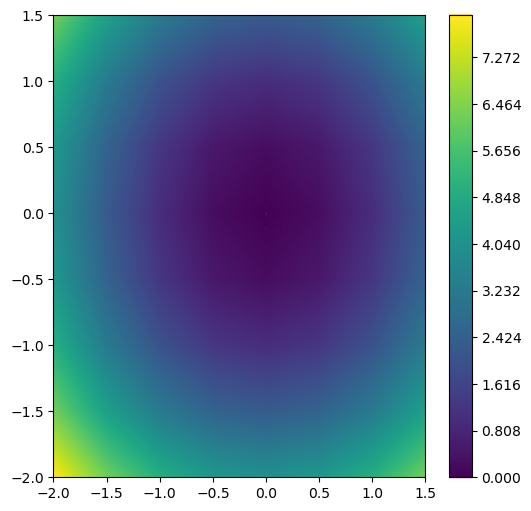

In [6]:
x = np.arange(-2, 2, 0.5)
y = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(x, y)
print(X.shape)

pts = np.stack([X.ravel(), Y.ravel()]).T
f_ls = np.zeros((pts.shape[0]))

miu = np.array([0, 0])
sigma_ls = np.array([
  [[1, 0], [0, 1]],
  [[0.5, 0], [0, 2]],
  [[0.5, 0.1], [0.5, 2]],
  [[0.5, 0.1], [-0.5, 2]]
  ])
print(sigma_ls.shape)

def F(pt, sigma):
  return np.array([(pt - miu).T @ np.linalg.inv(sigma) @ (pt - miu)])

f_ls = np.array([F(pt, sigma) for sigma in sigma_ls for pt in pts])
print(f_ls.shape)
Z = f_ls.reshape(sigma_ls.shape[0], X.shape[0], X.shape[1])
print(Z.shape)
print(Z[0].shape)
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(1,1,(1,1))
res1 = ax1.contour(X, Y, Z[0], 1000)
fig1.colorbar(res1)

Locator attempting to generate 1001 ticks ([0.0, ..., 10.0]), which exceeds Locator.MAXTICKS (1000).


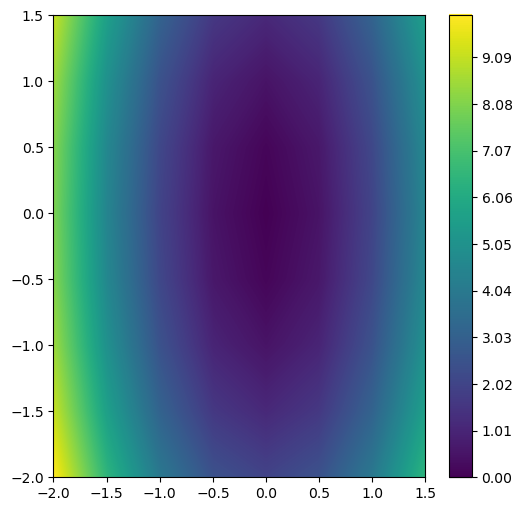

In [9]:
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(1,1,(1,1))
res2 = ax2.contour(X, Y, Z[1], 1000)
fig2.colorbar(res2)

In [ ]:
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(1,1,(1,1))
res2 = ax2.contour(X, Y, Z[1], 1000)
fig2.colorbar(res2)

In [3]:
print(x)
print(y)
print(X)
print(Y)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
[[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]]
[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5]]


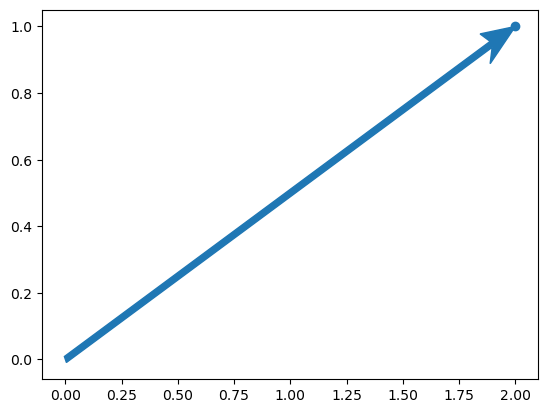

In [5]:
v1 = np.array([2.0, 1.0])

origin = np.array([0,0])

def show_vector(ax, start, end, label='', color=None, **kwargs):
    vec = np.stack([start, end])    
    lines = ax.plot(end[0], end[1], 'o', label=label, color=color, **kwargs)
    if color is None:
        color = lines[0].get_color()
    ax.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1], head_width=0.1, width=0.02, overhang=0.2, length_includes_head=True, color=color, **kwargs)
    

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# show the original vectors
show_vector(ax, origin, v1, 'V1')

# 1 a

In [11]:
data = np.array([[170, 60],
[172, 60],
[173, 61], 
[173, 64], 
[175, 67], 
[175, 66]])

In [12]:
print(data)

[[170  60]
 [172  60]
 [173  61]
 [173  64]
 [175  67]
 [175  66]]


In [18]:
Abel = [173, 62]
print(data-Abel)
res = np.linalg.norm(data-Abel, ord=2, axis=1)
print(res)

[[-3 -2]
 [-1 -2]
 [ 0 -1]
 [ 0  2]
 [ 2  5]
 [ 2  4]]
[3.60555128 2.23606798 1.         2.         5.38516481 4.47213595]


# 1 b

In [24]:
data_cov = np.cov(data, rowvar=False)
print(data)
print()
print(data_cov)
eig_values, eig_vectors = np.linalg.eig(data_cov)
print(eig_values)
print()
print(eig_vectors)

[[170  60]
 [172  60]
 [173  61]
 [173  64]
 [175  67]
 [175  66]]

[[3.6 5.2]
 [5.2 9.6]]
[ 0.59666759 12.60333241]

[[-0.86594528 -0.50013875]
 [ 0.50013875 -0.86594528]]


In [29]:
print(eig_vectors[:, 1])
pca = data @ eig_vectors[:, 1]
print(pca)

[-0.50013875 -0.86594528]
[-136.98030494 -137.98058245 -139.34666648 -141.94450232 -145.54261566
 -144.67667038]
